In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


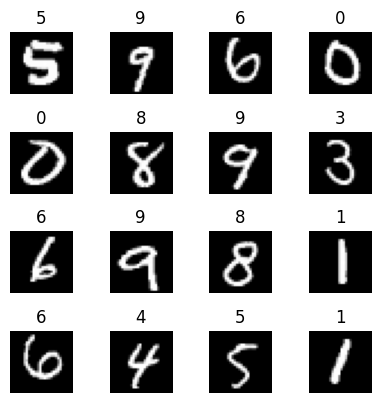

In [3]:
m, _, _ = x_train.shape

fig, axes = plt.subplots(4, 4, figsize=(4,4))
fig.tight_layout(pad=0.1)

for _, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = x_train[random_index]
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

In [4]:
print(f'x shape: {x_train.shape}')
print(f'y shape: {y_train.shape}')

x shape: (60000, 28, 28)
y shape: (60000,)


In [5]:
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [6]:
print(f'x_train_reshaped: {x_train_reshaped.shape}')

x_train_reshaped: (60000, 784)


In [7]:
norm_l = keras.layers.Normalization(axis=-1)
norm_l.adapt(x_train_reshaped)
x_train_reshaped = norm_l(x_train_reshaped)
x_test_reshaped = norm_l(x_test_reshaped)

In [8]:
model = Sequential([
    keras.Input(shape=(x_train_reshaped.shape[1],)),
    Dense(units=128, activation='relu'),
    Dense(units=10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

model.fit(x_train_reshaped, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 6.4670 - accuracy: 0.8749
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 5.1170 - accuracy: 0.9240
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 4.3474 - accuracy: 0.9390
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 4.0236 - accuracy: 0.9491
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9940 - accuracy: 0.9567


In [10]:
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 12392.2637 - accuracy: 0.9522
Test accuracy: 95.22%


In [11]:
predictions = model.predict(x_test_reshaped)

313/313 [==============================] - 1s 2ms/step


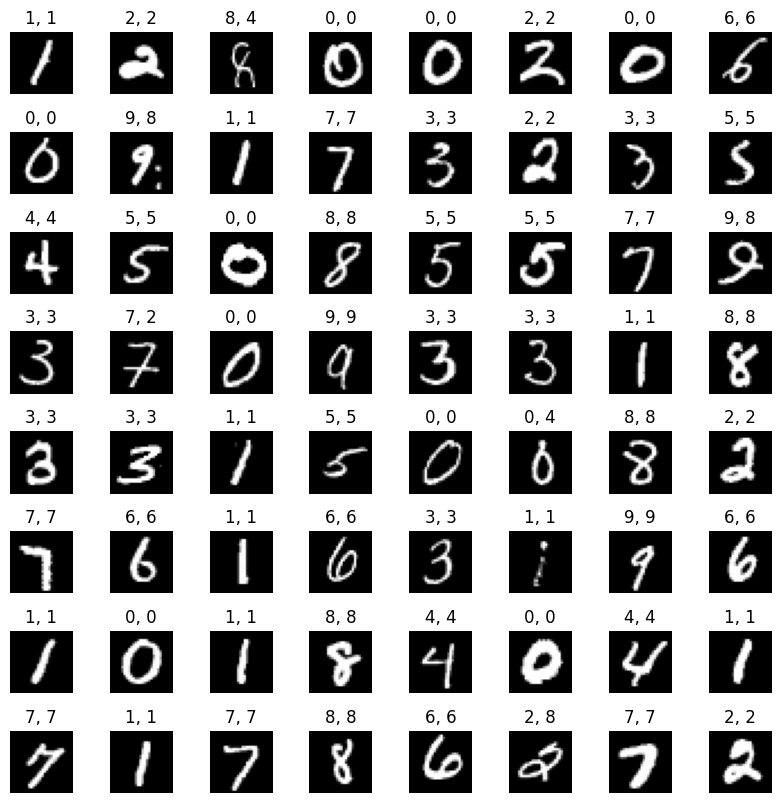

In [12]:
m, _ = x_test_reshaped.shape

fig, axes = plt.subplots(8, 8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for _, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    ax.imshow(x_test[random_index], cmap='gray')
    ax.set_title(f'{y_test[random_index]}, {np.argmax(predictions[random_index])}')
    ax.set_axis_off()